In [1]:
from sklearn import datasets
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)

<AxesSubplot:xlabel='x', ylabel='y'>

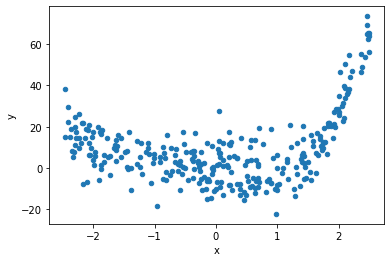

In [2]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [3]:
X_bc = data_breast_cancer["data"][["mean texture", "mean symmetry"]]
X_bc

,mean texture,mean symmetry
0,10.38,0.2419
1,17.77,0.1812
2,21.25,0.2069
3,20.38,0.2597
4,14.34,0.1809
...,...,...
564,22.39,0.1726
565,28.25,0.1752
566,28.08,0.1590
567,29.33,0.2397


In [4]:
y_bc = data_breast_cancer["target"]
y_bc

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2)

In [6]:
# https://www.kaggle.com/code/faressayah/decision-trees-random-forest-for-beginners/notebook

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {"max_depth":(list(range(1, 20)))}

In [9]:
tree_clf_bc = DecisionTreeClassifier(random_state=42)
tree_cv_bc = GridSearchCV(tree_clf_bc, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
tree_cv_bc.fit(X_train_bc, y_train_bc)
best_params_bc = tree_cv_bc.best_params_
print(f"Best paramters: {best_params_bc})")

Fitting 3 folds for each of 19 candidates, totalling 57 fits
Best paramters: {'max_depth': 4})


In [10]:
tree_clf_bc = DecisionTreeClassifier(**best_params_bc)
tree_clf_bc.fit(X_train_bc, y_train_bc)

DecisionTreeClassifier(max_depth=4)

In [11]:
from sklearn.tree import export_graphviz
f = "bc"
export_graphviz(
        tree_clf_bc,
        out_file=f,
        feature_names=["mean texture", "mean symmetry"],
        class_names=[str(num)+", "+name
                     for num,name in
                     zip(set(data_breast_cancer["target"]), data_breast_cancer.target_names)],
        rounded=True,
        filled=True)

In [12]:
import graphviz
print(graphviz.render('dot', 'png', f))

bc.png


In [13]:
y_train_pred_bc = tree_clf_bc.predict(X_train_bc)
y_test_pred_bc = tree_clf_bc.predict(X_test_bc)

In [14]:
from sklearn.metrics import accuracy_score, f1_score
train_acc_bc = accuracy_score(y_train_bc, y_train_pred_bc)
test_acc_bc = accuracy_score(y_test_bc, y_test_pred_bc)
train_f1_bc = f1_score(y_train_bc, y_train_pred_bc)
test_f1_bc = f1_score(y_test_bc, y_test_pred_bc)

In [15]:
max_depth = best_params_bc["max_depth"]

In [16]:
f1acc_tree = [max_depth, train_f1_bc, test_f1_bc, train_acc_bc, test_acc_bc]
f1acc_tree

[4,
 0.8504983388704319,
 0.7887323943661971,
 0.8021978021978022,
 0.7368421052631579]

In [17]:
import pickle
with open('f1acc_tree.pkl', 'wb') as fp:
    pickle.dump(f1acc_tree, fp)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
from sklearn.metrics import make_scorer, mean_squared_error
mse = make_scorer(mean_squared_error,greater_is_better=False)

In [20]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring=mse, n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 19 candidates, totalling 57 fits


/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
57 fits failed out of a total of 57.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/sklearn/tree/_classes.p

NotFittedError: All estimators failed to fit

In [ ]:
tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

In [ ]:
df.plot.scatter(x='x',y='y')

In [ ]:
y_train_pred = tree_clf.predict(X_train)
y_test_pred = tree_clf.predict(X_test)